# ЛБ #3

## Инициализация

In [29]:
import scipy as sp
import pylab as pl
import cmath as cm
import copy as cp


source_function = (lambda x: sp.sin(6*x) + sp.cos(5*x))
source_function_period = sp.pi * 2
N = 32
log2N = int(sp.log2(N))

## Исходный

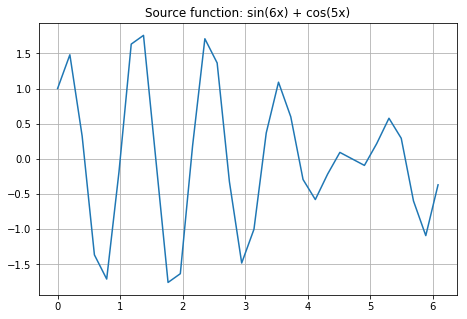

In [30]:
source_x = sp.arange(0, source_function_period, (source_function_period/N))
source_y = sp.vectorize(source_function)(source_x)


pl.figure(figsize = (15/2. , 5))
pl.title("Source function: sin(6x) + cos(5x)")
pl.plot(source_x, source_y)
pl.grid()
pl.show()

## Функции Уолша

In [31]:
def reverse(m):
    r = []
    for i in range(len(m)):
        r += [[]]
        for j in range(len(m[i])):
            r[i] += [-m[i][j]]
    return r

def adamaro(n):
    if (n == 0):
        return 1
    else:
        if (n == 1):
            return [[1, 1], [1, -1]]
        else:
            p = adamaro(n-1)
            r = reverse(p)
            res = []
            for i in range(len(p)):
                res += [p[i] + p[i]]
            for i in range(len(p)):
                res += [p[i] + r[i]]
            return res

w2a = lambda x, n: sum(1<<(n-1-i) for i in range(n) if (x ^ (x>>1)) >> i&1)

ad_matrix = adamaro(log2N)

def get_walsh_adamaro(n, x):
    return ad_matrix[w2a(n, log2N)][x]

def get_walsh_walsh(n, x):
    return ad_matrix[n][x]

get_walsh = lambda n, x: get_walsh_walsh(n, x)

## Обратное преобразование Уолша

In [32]:
def reverse_transformation(data, n, period):
    result = []
    float_n = float(n)
    for k in range(n):
        result.append(0)
        for i in range(n):
            result[k] += data[i] * get_walsh(k, i)
    return result

## Дискретное преобразование Уолша

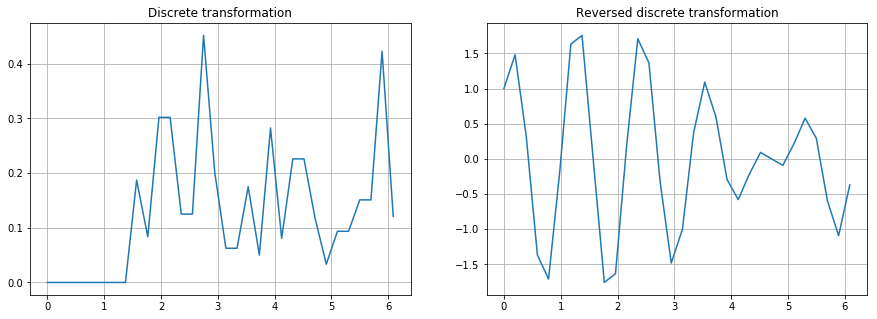

In [33]:
def discrete_transformation(f, n, period):
    discrete_result = []
    float_n = float(n)
    for k in range(n):
        discrete_result.append(0)
        for i in range(n):
            discrete_result[k] += get_walsh(k, i) * f(period * (i/float_n))
        discrete_result[k] /= float_n
    return discrete_result

discrete_result = discrete_transformation(source_function, N, source_function_period)

discrete_y = sp.array([abs(x) for x in discrete_result])
discrete_reverset_y = reverse_transformation(discrete_result, N, source_function_period)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_x, discrete_y)
pl.title("Discrete transformation")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_x, discrete_reverset_y)
pl.title("Reversed discrete transformation")
pl.grid()
pl.show()

## Быстрое преобразование Уолша

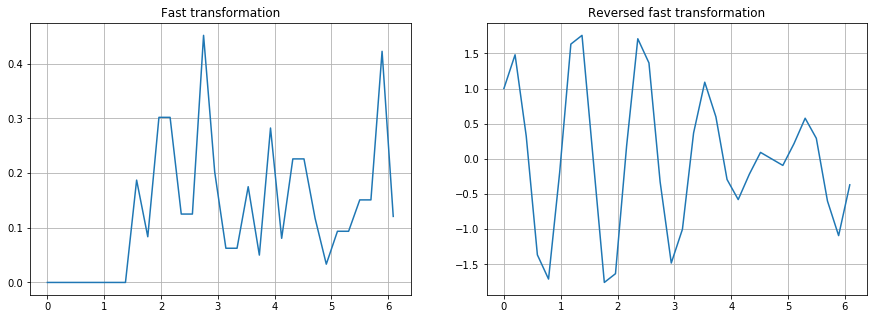

In [34]:
def fast_walsh(f, N, period):
    source_data_set = []
    for i in range(N):
        source_data_set.append(f((float(period)/N) * i))
    return [x/N for x in fast_walsh_recursive(source_data_set)]

def fast_walsh_recursive(data_set):
    n = int(len(data_set)/2)
    if n == 1: 
        return [data_set[0] + data_set[1], data_set[0] - data_set[1]]
    else:
        top_data_set = []
        bot_data_set = []
        for i in range(n):
            top_data_set.append(data_set[i] + data_set[i+n])
            bot_data_set.append(data_set[i] - data_set[i-n])
        return fast_walsh_recursive(top_data_set) + fast_walsh_recursive(bot_data_set)

fast_result = fast_walsh(source_function, N, source_function_period)

fast_y = sp.array([abs(x) for x in fast_result])
fast_reverset_y = reverse_transformation(fast_result, N, source_function_period)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_x, fast_y)
pl.title("Fast transformation")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_x, fast_reverset_y)
pl.title("Reversed fast transformation")
pl.grid()
pl.show()